In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#First we generate the piano roll from y_test_pred, that has been predicted by the model
arr = np.load('/content/drive/MyDrive/model/y_pred.npy')
# arr=np.squeeze(arr, axis=-2)
print(np.shape(arr))

(578322, 88)


In [6]:
#converting boolean to binary matrix with entries 0 and 1
arr2 = np.empty((578322, 88), dtype = int)
X=arr 
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j]==False:
            arr2[i,j]=int(0)
            int(arr2[i,j])
        elif X[i,j]==True:
            arr2[i,j]=int(1)

         
print(arr2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [7]:
!pip install midiutil

In [8]:
from midiutil.MidiFile import MIDIFile

mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr2.shape[1]):
        if X[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)


In [9]:
#generate the MIDI file for y_test_pred
with open("output_final.mid", 'wb') as outf:
    mf.writeFile(outf)

In [10]:
!pip install pretty_midi

In [11]:
import pretty_midi
import pandas as pd
path = "output_final.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

          Start         End  Pitch  Velocity Instrument
0        0.0000    0.000521     36       100     Output
1        0.0000    0.004687     45       100     Output
2        0.0000    0.004687     73       100     Output
3        0.0000    0.004687     81       100     Output
4        0.0000    0.004687     83       100     Output
...         ...         ...    ...       ...        ...
44829  124.9625  124.967187     41       100     Output
44830  124.9625  124.967187     53       100     Output
44831  124.9875  124.992188     17       100     Output
44832  124.9875  124.992188     41       100     Output
44833  124.9875  124.992188     53       100     Output

[44834 rows x 5 columns]


From Model


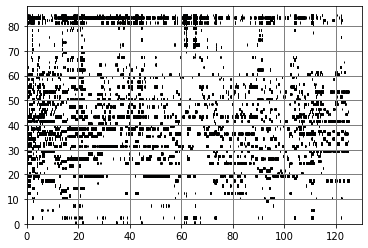

In [12]:
fig, ax = plt.subplots()

i = 0
while(i<44833) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('From Model')
plt.show()

In [13]:
#Now we generate the piano roll from y_test to check if it matches with the prediction
arr3 = np.load('/content/drive/MyDrive/model/test/Y_final_Label_.npy')
arr3=np.squeeze(arr3, axis=-2)
print(np.shape(arr3))

(15219, 38, 88)


In [14]:
#again backtracking to convert 3D array to 2D
X2=[]
i=0
for i in range(15219):
  print(i)
  if i==0:
    X2=arr3[0]
  else:
    X2=np.concatenate((X2, arr3[i]), axis=0)
print(X2.shape)

Streaming output truncated to the last 5000 lines.
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
1

In [15]:
arr4 = np.empty((578322, 88), dtype = int) 
for i in range(X2.shape[0]):
    for j in range(X.shape[1]):
        if X2[i,j]==False:
            arr4[i,j]=int(0)
            int(arr4[i,j])
        elif X2[i,j]==True:
            arr4[i,j]=int(1)

         
print(arr4)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
print(np.count_nonzero(arr4))

2484159


In [17]:
mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr4.shape[1]):
        if X2[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)


In [18]:
with open("output_final_actual.mid", 'wb') as outf:
    mf.writeFile(outf)

In [19]:
path = "output_final_actual.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

            Start         End  Pitch  Velocity Instrument
0        0.000000    0.000521     36       100     Output
1        0.000000    0.000521     48       100     Output
2        0.000521    0.001042     36       100     Output
3        0.000521    0.001042     48       100     Output
4        0.001042    0.001563     36       100     Output
...           ...         ...    ...       ...        ...
34573  124.612500  124.617188     29       100     Output
34574  124.837500  124.842187     41       100     Output
34575  124.837500  124.842187     53       100     Output
34576  124.987500  124.992188     41       100     Output
34577  124.987500  124.992188     53       100     Output

[34578 rows x 5 columns]


Actual


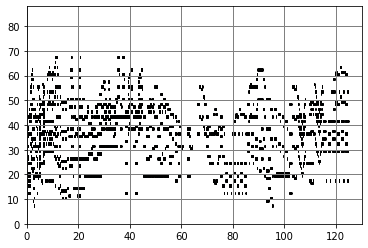

In [20]:
fig, ax = plt.subplots()

i = 0
while(i<34577) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('Actual')
plt.show()